# MNIST with CNN

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [0]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [55]:
# The color is encoded as a number from 0 to 255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
# Keras wants the picture not in a 3D tensor but in a 4D tensor
# first dimension is the different pictures
# second and third dimensions are the 28x28 x and y axis of the picture
# fourth dimension: Color channel (we only have one color (gray))
# reshape train and test data to 4D tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [57]:
# gray scale is encodes an integer between 0 to 255
# the neural network needs at as a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# We rescale the tensor so that the numbers are between 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


true class: 4


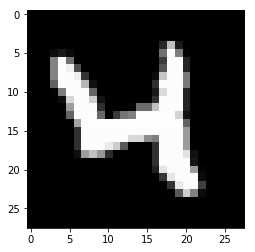

In [58]:
# Let us us look at an example
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [0]:
# convert class vectors to one-hot endoded binary class matrices
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#from numpy import argmax
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder##

# integer encode
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(y_train)
#print(integer_encoded)
# binary encode
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)
#y_train = onehot_encoded

true class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


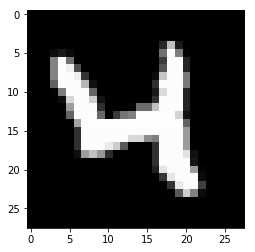

In [60]:
# Show the image 20 with the true class
img_index = 20
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index],(28,28)),cmap='gray')

In [61]:
# Create a Sequential Model
# Add a Convolutional Layer with the 32 Kernels, each with the size 3x3, user Relu as the activation function, and define the input shape
# Add another Convolutional Layer with the 64 Kernels, each with the size 3x3, user Relu as the activation function
# Add a Max Pooling Layer with pool size of 2x2
# Add then a Dropout of 25%
# Add then a Flatten Operator to get a one dimensional vector
# Add a dense layer with 128 node and Relu activation
# Add then a Dropout of 50%
# Finally add a dense layer for the output. Think about the number of nodes and the activation function you need
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))


W0617 08:47:29.583385 139650928502656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 08:47:29.630360 139650928502656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 08:47:29.639324 139650928502656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 08:47:29.680292 139650928502656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0617 08:47:29.684167 139650928502656 deprecation_wrapp

In [0]:
# Compile the model
# Think about the appropiate loss function
# Use as the Optimizer Adadelta
# Add as another metric Accuracy
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])


In [72]:
# Fit the model
# save the learning history in a variable history
# use batch size 128, and 12 epochs
history = model.fit(x_train, y_train, batch_size=128, epochs=12,  validation_split=0.15)


Train on 51000 samples, validate on 9000 samples
Epoch 1/12
51000/51000 [==============================] - 5s 102us/step - loss: 0.0229 - acc: 0.9914 - val_loss: 0.0055 - val_acc: 0.9986
Epoch 2/12
51000/51000 [==============================] - 5s 97us/step - loss: 0.0231 - acc: 0.9906 - val_loss: 0.0132 - val_acc: 0.9968
Epoch 3/12
51000/51000 [==============================] - 5s 101us/step - loss: 0.0245 - acc: 0.9912 - val_loss: 0.0074 - val_acc: 0.9973
Epoch 4/12
51000/51000 [==============================] - 5s 98us/step - loss: 0.0206 - acc: 0.9924 - val_loss: 0.0087 - val_acc: 0.9978
Epoch 5/12
51000/51000 [==============================] - 5s 101us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0105 - val_acc: 0.9979
Epoch 6/12
51000/51000 [==============================] - 5s 98us/step - loss: 0.0199 - acc: 0.9922 - val_loss: 0.0078 - val_acc: 0.9976
Epoch 7/12
51000/51000 [==============================] - 5s 100us/step - loss: 0.0248 - acc: 0.9905 - val_loss: 0.0090 - val_

In [73]:
# Test the model based on the test data
# Print the Test loss and the test accuracy
test_eval = model.evaluate(x_test, y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 62us/step
Test loss: 0.04054014578734193
Test accuracy: 0.9911


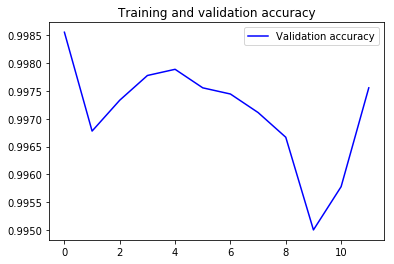

In [74]:
# Create a plot to show Training and Validation Accuracy
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
accuracy = history.history['acc']
epochs = range(len(accuracy))
val_accuracy = history.history['val_acc']
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


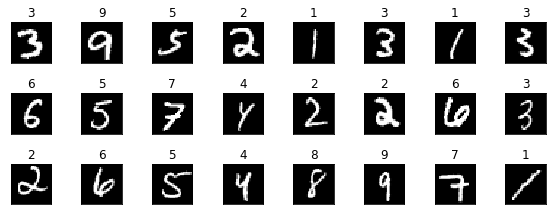

In [75]:
# Shows Test Pictures and predicted class
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()

In [77]:
# Show a Model Summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________